In [21]:
library(forecast)

In [22]:
setwd("C:/E/DataScience/ARIMA/")

In [23]:
vFileData <- read.csv("monthly-closings-of-the-dowjones.csv",header = TRUE, sep = ',')
head(vFileData)


,Month,Dow_Jones
1,1968-08,3645
2,1968-09,3626
3,1968-10,3634
4,1968-11,3620.5
5,1968-12,3607
6,1969-01,3589


In [24]:
vFileData <- na.trim(vFileData)


In [25]:
str(vFileData)

'data.frame':	291 obs. of  2 variables:
 $ Month    : Factor w/ 291 levels "1968-08","1968-09",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Dow_Jones: num  3645 3626 3634 3620 3607 ...


# Convert the data frame to TimeSeries, starting from Aug 1968, monthwise

tsData <- ts(vFileData$Dow_Jones, start = c(1968,8), frequency = 12)
head(tsData)
time(tsData)
plot(tsData)



Series: tsData 
ARIMA(0,1,0) with drift         

Coefficients:
       drift
      0.7241
s.e.  1.3231

sigma^2 estimated as 507.7:  log likelihood=-1314.83
AIC=2633.65   AICc=2633.69   BIC=2640.99

Training set error measures:
                     ME     RMSE      MAE          MPE      MAPE      MASE
Training set 0.01252328 22.49438 16.89983 -0.001423038 0.4494054 0.2816386
                   ACF1
Training set 0.04655663


,2.5 %,97.5 %
drift,-1.869153,3.317428


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Nov 1992       3855.724 3826.848 3884.600 3811.562 3899.886
Dec 1992       3856.448 3815.611 3897.285 3793.994 3918.903
Jan 1993       3857.172 3807.158 3907.187 3780.681 3933.663
Feb 1993       3857.897 3800.144 3915.649 3769.572 3946.221
Mar 1993       3858.621 3794.052 3923.190 3759.871 3957.370
Apr 1993       3859.345 3788.613 3930.076 3751.170 3967.520
May 1993       3860.069 3783.670 3936.468 3743.227 3976.911
Jun 1993       3860.793 3779.119 3942.467 3735.884 3985.702
Jul 1993       3861.517 3774.889 3948.145 3729.031 3994.004
Aug 1993       3862.241 3770.927 3953.556 3722.588 4001.894
Sep 1993       3862.966 3767.194 3958.737 3716.496 4009.435
Oct 1993       3863.690 3763.660 3963.719 3710.708 4016.672
Nov 1993       3864.414 3760.300 3968.528 3705.185 4023.643
Dec 1993       3865.138 3757.094 3973.182 3699.898 4030.378
Jan 1994       3865.862 3754.026 3977.699 3694.823 4036.901
Feb 1994       3866.586 3751.082 3982.09

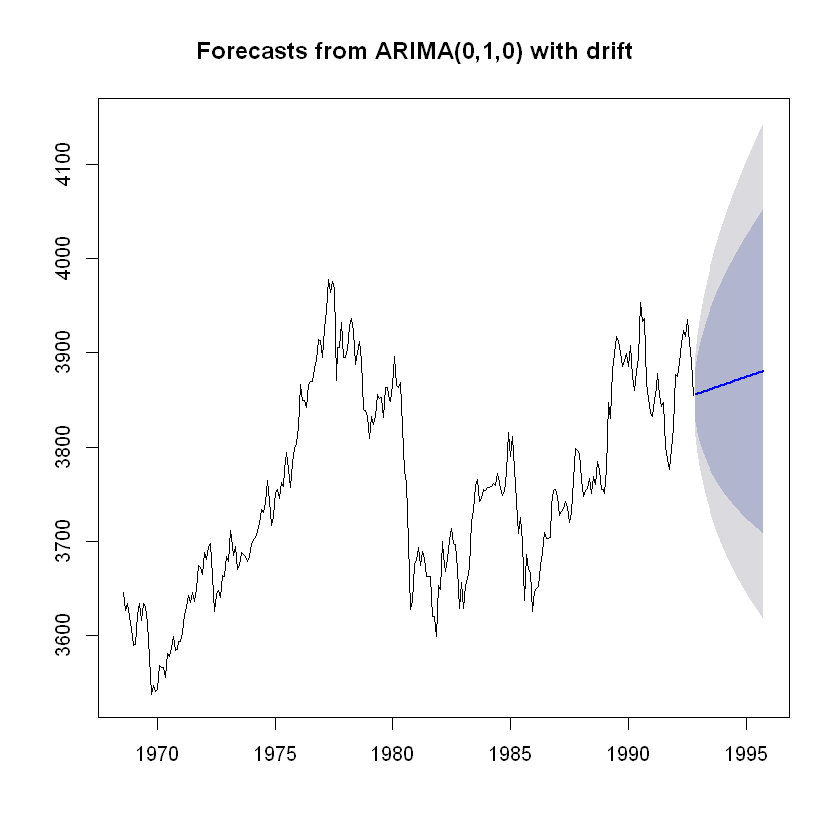

In [26]:
# Auto Arima model
model_AutoArima <- auto.arima(tsData)
summary(model_AutoArima)
confint(model_AutoArima)
forecast(model_AutoArima, 36)
plot(forecast(model_AutoArima, 36))
###############


Call:
arima(x = tsData, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1)))

Coefficients:
         ma1     sma1
      0.0427  -1.0000
s.e.  0.0576   0.0622

sigma^2 estimated as 485:  log likelihood = -1273.17,  aic = 2552.35

Training set error measures:
                   ME     RMSE      MAE         MPE      MAPE      MASE
Training set 0.214874 21.53931 15.99736 0.004865082 0.4253661 0.9425507
                    ACF1
Training set 0.001581221


,2.5 %,97.5 %
ma1,-0.07027329,0.15566911
sma1,-1.1218406,-0.8781476


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Nov 1992       3853.272 3824.466 3882.077 3809.218 3897.326
Dec 1992       3857.773 3816.157 3899.389 3794.127 3921.419
Jan 1993       3858.107 3806.784 3909.430 3779.616 3936.598
Feb 1993       3872.400 3812.934 3931.865 3781.455 3963.344
Mar 1993       3874.651 3808.031 3941.271 3772.764 3976.538
Apr 1993       3878.194 3805.116 3951.272 3766.431 3989.957
May 1993       3881.113 3802.103 3960.122 3760.278 4001.947
Jun 1993       3881.698 3797.172 3966.224 3752.426 4010.969
Jul 1993       3886.158 3796.454 3975.862 3748.968 4023.348
Aug 1993       3873.462 3778.863 3968.060 3728.786 4018.138
Sep 1993       3871.542 3772.297 3970.787 3719.760 4023.324
Oct 1993       3862.983 3759.299 3966.666 3704.412 4021.553
Nov 1993       3862.394 3754.128 3970.660 3696.816 4027.972
Dec 1993       3866.895 3754.219 3979.571 3694.573 4039.217
Jan 1994       3867.229 3750.310 3984.148 3688.417 4046.042
Feb 1994       3881.522 3760.508 4002.53

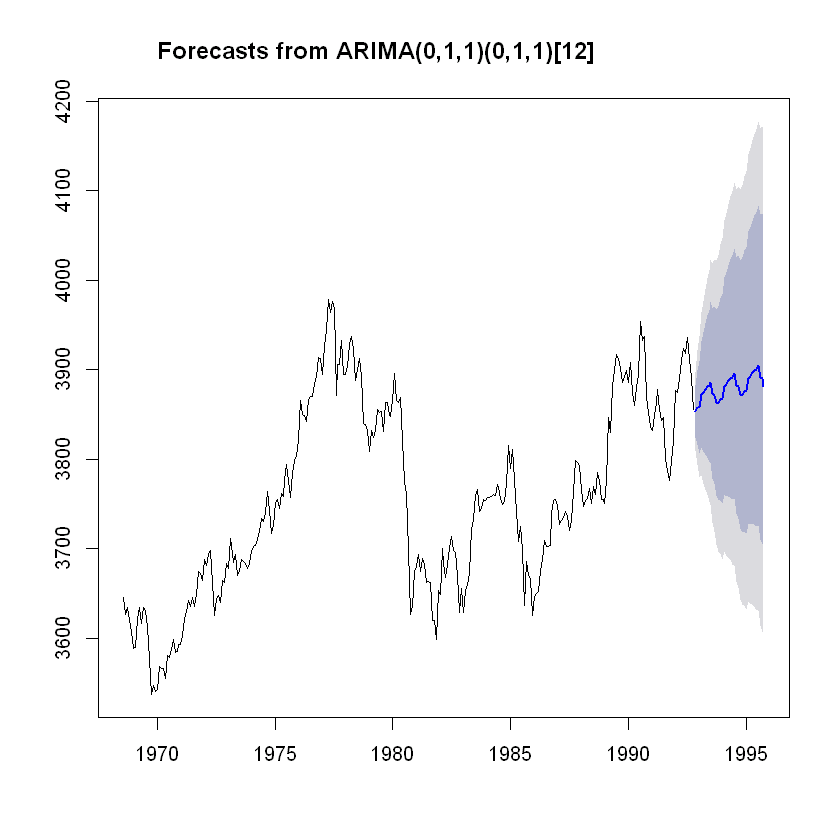

In [27]:
# Arima model
model_Arima <- arima(tsData, order = c(0,1,1), seasonal = list(order =c(0,1,1)))
summary(model_Arima)
confint(model_Arima)
forecast(model_Arima, 36)
plot(forecast(model_Arima, 36))
###############


ERROR: Error in UseMethod("vcov"): no applicable method for 'vcov' applied to an object of class "ets"


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Nov 1992       3855.004 3825.535 3884.472 3809.936 3900.071
Dec 1992       3855.004 3813.331 3896.676 3791.271 3918.736
Jan 1993       3855.004 3803.966 3906.041 3776.948 3933.059
Feb 1993       3855.004 3796.070 3913.937 3764.873 3945.135
Mar 1993       3855.004 3789.114 3920.893 3754.234 3955.773
Apr 1993       3855.004 3782.824 3927.183 3744.615 3965.392
May 1993       3855.004 3777.041 3932.966 3735.770 3974.238
Jun 1993       3855.004 3771.657 3938.350 3727.536 3982.471
Jul 1993       3855.004 3766.601 3943.406 3719.803 3990.204
Aug 1993       3855.004 3761.818 3948.189 3712.489 3997.519
Sep 1993       3855.004 3757.269 3952.738 3705.531 4004.476
Oct 1993       3855.004 3752.922 3957.085 3698.884 4011.123
Nov 1993       3855.004 3748.753 3961.254 3692.508 4017.500
Dec 1993       3855.004 3744.741 3965.266 3686.372 4023.635
Jan 1994       3855.004 3740.870 3969.137 3680.452 4029.555
Feb 1994       3855.004 3737.126 3972.88

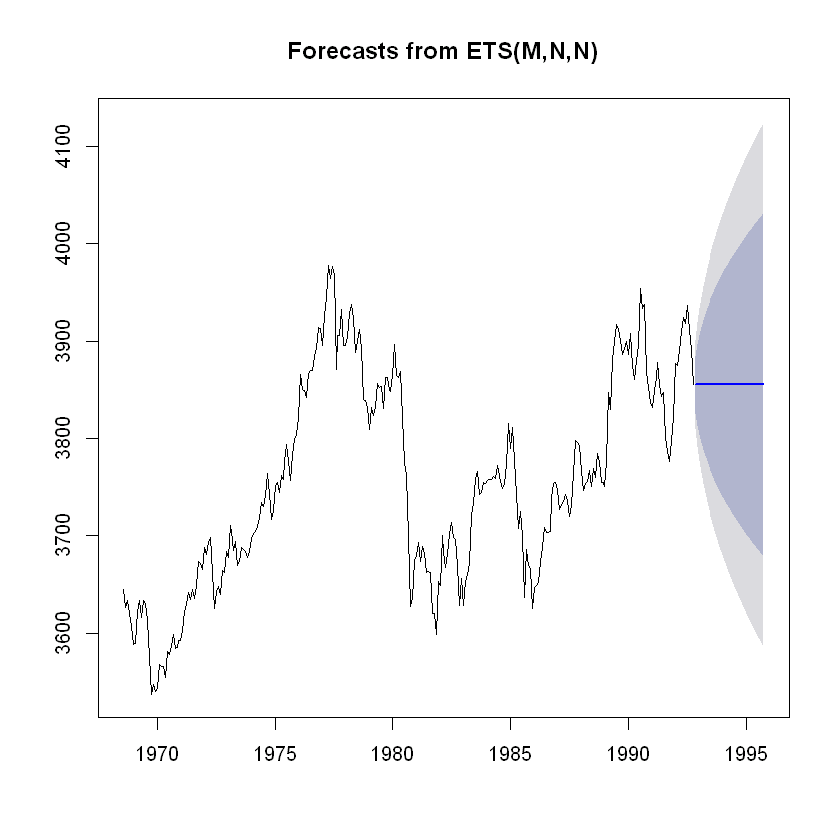

In [28]:
# ETS model
model_Ets <- ets(tsData)
confint(model_Ets)
forecast(model_Ets, 36)
plot(forecast(model_Ets, 36))
###############

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Nov 1992       3851.879 3819.100 3884.658 3801.747 3902.011
Dec 1992       3846.918 3802.886 3890.951 3779.577 3914.260
Jan 1993       3842.089 3788.972 3895.206 3760.854 3923.325
Feb 1993       3845.468 3784.456 3906.479 3752.158 3938.777
Mar 1993       3851.258 3783.125 3919.390 3747.058 3955.457
Apr 1993       3853.625 3778.923 3928.328 3739.379 3967.872
May 1993       3865.931 3785.074 3946.787 3742.271 3989.590
Jun 1993       3871.999 3785.314 3958.684 3739.425 4004.572
Jul 1993       3886.240 3793.989 3978.491 3745.154 4027.325
Aug 1993       3869.694 3772.095 3967.294 3720.429 4018.960
Sep 1993       3874.997 3772.231 3977.763 3717.830 4032.164
Oct 1993       3860.945 3753.167 3968.722 3696.113 4025.776
Nov 1993       3857.824 3744.040 3971.607 3683.807 4031.841
Dec 1993       3852.863 3734.363 3971.363 3671.633 4034.094
Jan 1994       3848.034 3724.915 3971.153 3659.739 4036.329
Feb 1994       3851.412 3723.760 3979.06

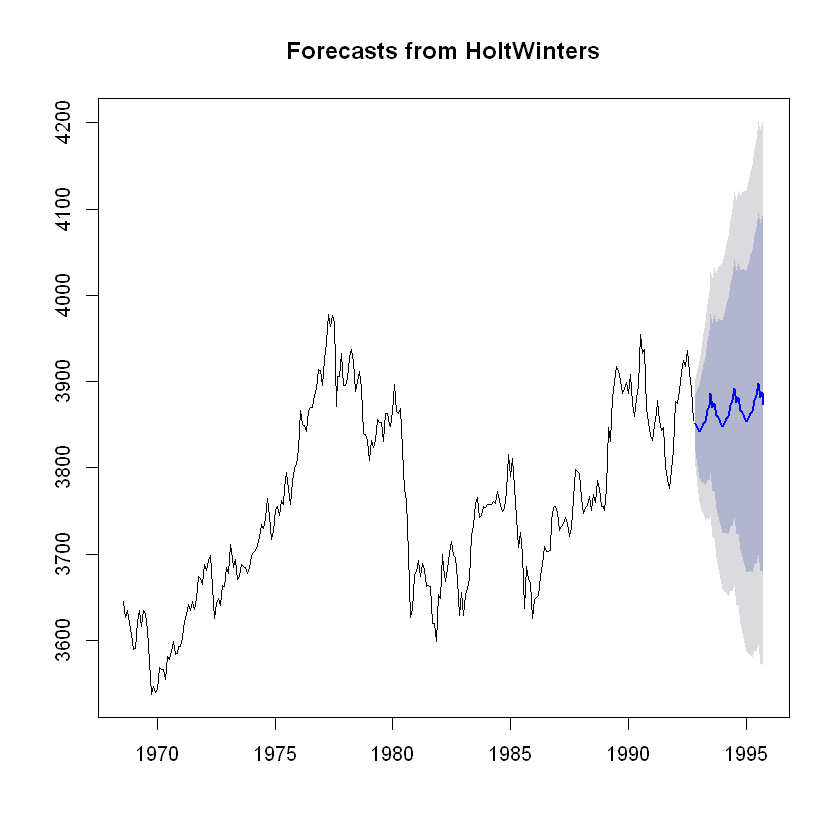

In [29]:
# Holt Winters model
model_Holt <- HoltWinters(tsData)
forecast(model_Holt, 36)
plot(forecast(model_Holt, 36))
###############



,2.5 %,97.5 %
(Intercept),3611.822,3694.980
trend,0.4960969,0.7512306
season2,-39.08377,66.41978
season3,-37.45790,68.04658
season4,-34.54067,70.96535
season5,-32.24874,73.25943
season6,-32.29046,73.22049
season7,-28.45749,77.05686
season8,-42.01359,62.42960
season9,-44.55772,59.88640


         Point Forecast    Lo 80    Hi 80   Lo 95    Hi 95
Nov 1992       3831.925 3709.578 3954.271 3644.44 4019.409

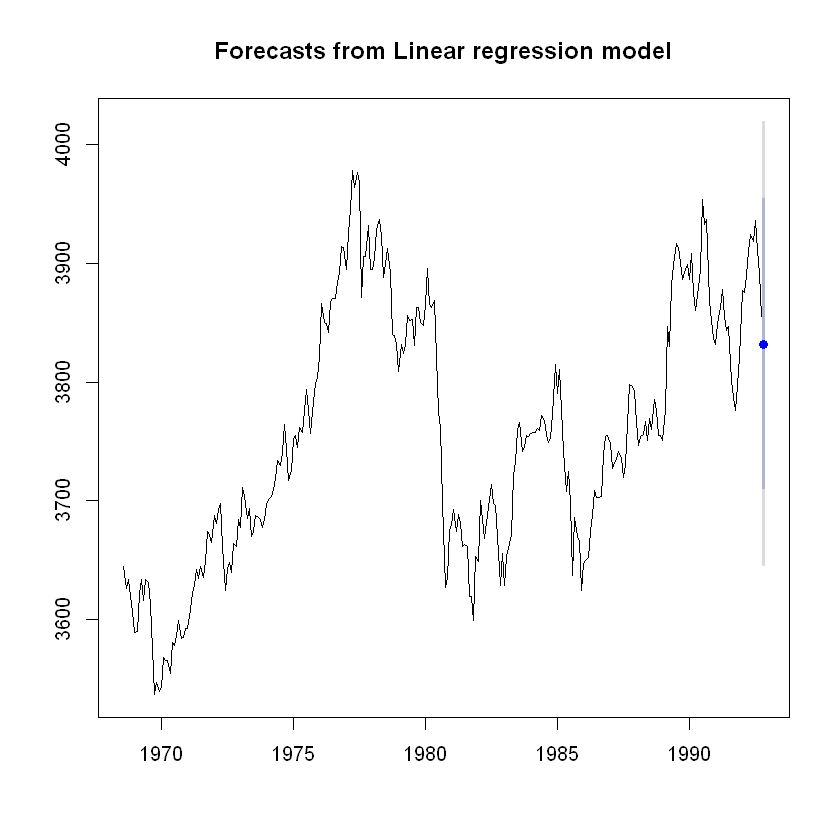

In [30]:
# TSLM model
model_Tslm <- tslm(tsData ~ trend+season)
confint(model_Tslm)
forecast(model_Tslm, 36)
plot(forecast(model_Tslm, 36))
###############



[1] 1 2 3 4

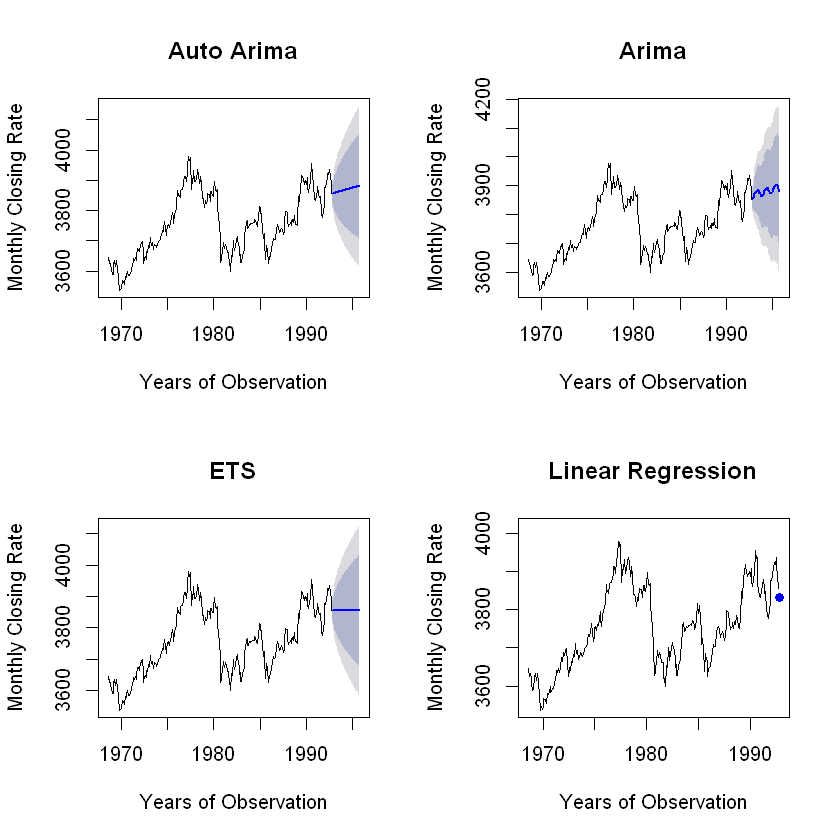

In [31]:
# Plot the forecast for comparison
split.screen(figs = c(2,2))
screen(1)
plot(forecast(model_AutoArima,36), main = "Auto Arima", xlab = "Years of Observation", ylab = "Monthly Closing Rate")

screen(2)
plot(forecast(model_Arima,36), main = "Arima", xlab = "Years of Observation", ylab = "Monthly Closing Rate")

screen(3)
plot(forecast(model_Ets,36), main = "ETS", xlab = "Years of Observation", ylab = "Monthly Closing Rate")

screen(4)
plot(forecast(model_Tslm,36), main = "Linear Regression", xlab = "Years of Observation", ylab = "Monthly Closing Rate")

close.screen(all = TRUE)

In [32]:
# Compare the AIC value
AIC(model_AutoArima, model_Arima, model_Ets, model_Tslm)

#####
# Conclusion:
# Since the AIC value of Arima model is less than all the other models. 
# We will use Arima model to forecast the DowJones monthly closing Data.
#####

Warning message:
In AIC.default(model_AutoArima, model_Arima, model_Ets, model_Tslm): models are not all fitted to the same number of observations

,df,AIC
model_AutoArima,2,2633.651
model_Arima,3,2552.348
model_Ets,2,3463.987
model_Tslm,14,3477.424
